<a href="https://colab.research.google.com/github/mafaldasalomao/CNN-ClassificationMNIST-Torch/blob/main/CNN_ClassificationMNIST_Torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import datasets
import pandas as np
import numpy as np
import seaborn as sns
import torchvision.transforms as transforms
torch.__version__


'1.12.1+cu113'

In [ ]:
torch.manual_seed(42)

In [ ]:
transform = transforms.ToTensor() # normalize bet 0-1

In [ ]:
from torchvision.datasets.mnist import MNIST
train = datasets.MNIST(root='.', train=True, download=True, transform=transform)
test = datasets.MNIST(root='.', train=False, download=True, transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
train.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [ ]:
train.data.shape

torch.Size([60000, 28, 28])

In [ ]:
28*28

784

In [ ]:
train.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [ ]:
train_loader = torch.utils.data.DataLoader(train, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=128, shuffle=True)

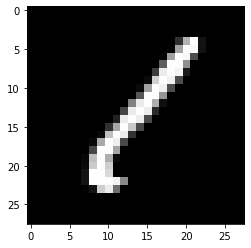

In [ ]:
img = next(iter(train_loader))[0][0].view(28, 28)
plt.imshow(img, cmap='gray')

In [ ]:
img.shape

torch.Size([28, 28])

(array([705.,   5.,   8.,   4.,   1.,   4.,   8.,   5.,   4.,  40.]),
 array([0.        , 0.09960784, 0.19921568, 0.29882354, 0.39843136,
        0.49803922, 0.5976471 , 0.6972549 , 0.7968627 , 0.8964706 ,
        0.99607843], dtype=float32),
 <a list of 10 Patch objects>)

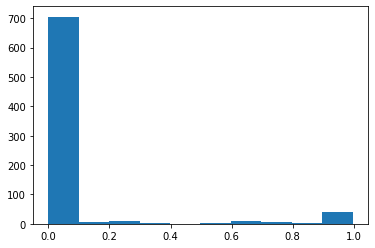

In [ ]:
plt.hist(img.view(-1))

In [ ]:
class classificador(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(3, 3))
    self.conv2= nn.Conv2d(32, 32, (3, 3))
    self.activation = nn.ReLU()
    self.bnorm = nn.BatchNorm2d(num_features=32)
    self.pool = nn.MaxPool2d(kernel_size=(2, 2))
    self.flatten = nn.Flatten()

    self.linear1 = nn.Linear(in_features=32*5*5, out_features=128)
    self.linear2 = nn.Linear(128, 128)
    self.output = nn.Linear(128, 10)
    self.dropout = nn.Dropout(0.2)
  def forward(self,X):
    X = self.pool(self.bnorm(self.activation(self.conv1(X))))
    X = self.pool(self.bnorm(self.activation(self.conv2(X))))
    X = self.flatten(X)

    X = self.dropout(self.activation(self.linear1(X)))
    X = self.dropout(self.activation(self.linear2(X)))
    X = self.output(X)
    return X

In [ ]:
net = classificador()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available else torch.device('cpu')
device

device(type='cuda')

In [ ]:
net.to(device)

classificador(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (activation): ReLU()
  (bnorm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=800, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [ ]:
def training_loop(loader, epoch):
  running_loss = 0.
  running_accuracy = 0.
  for i, data in enumerate(loader):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = net.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()

    optimizer.step()


    running_loss+= loss.item()
    ps = F.softmax(outputs)
    top_p, top_class = ps.topk(k = 1, dim = 1)
    equals = top_class == labels.view(*top_class.shape)

    accuracy = torch.mean(equals.type(torch.float))
    running_accuracy += accuracy
    # Imprimindo os dados referentes a este loop
    print('\rÉpoca {:3d} - Loop {:3d} de {:3d}: perda {:03.2f} - precisão {:03.2f}'.format(epoch + 1, i + 1, len(loader), loss, accuracy), end = '\r')
        
    # Imprimindo os dados referentes a esta época
    
  print('\rÉPOCA {:3d} FINALIZADA: perda {:.5f} - precisão {:.5f}'.format(epoch+1, running_loss/len(loader), running_accuracy/len(loader)))

In [ ]:
for epoch in range(5):
  print("training ....")
  training_loop(train_loader, epoch)
  net.eval()
  print("validando...")
  training_loop(train_loader, epoch)
  net.train()

training ....


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


ÉPOCA   1 FINALIZADA: perda 0.16003 - precisão 0.95190
validando...
ÉPOCA   1 FINALIZADA: perda 0.05106 - precisão 0.98498
training ....
ÉPOCA   2 FINALIZADA: perda 0.04361 - precisão 0.98702
validando...
ÉPOCA   2 FINALIZADA: perda 0.03024 - precisão 0.99082
training ....
ÉPOCA   3 FINALIZADA: perda 0.03777 - precisão 0.98900
validando...
ÉPOCA   3 FINALIZADA: perda 0.02414 - precisão 0.99296
training ....
ÉPOCA   4 FINALIZADA: perda 0.03448 - precisão 0.99031
validando...
ÉPOCA   4 FINALIZADA: perda 0.02018 - precisão 0.99354
training ....
ÉPOCA   5 FINALIZADA: perda 0.03090 - precisão 0.99167
validando...
ÉPOCA   5 FINALIZADA: perda 0.01302 - precisão 0.99602


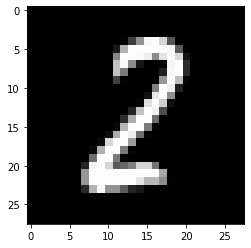

In [ ]:
img = next(iter(test_loader))[0][0].view(28, 28)
plt.imshow(img, cmap='gray')

In [ ]:
img.shape # (1, 1, 28, 28)

torch.Size([28, 28])

In [ ]:
img = img.view(1, 1, 28, 28)
img.shape

torch.Size([1, 1, 28, 28])

In [ ]:
net.eval()

classificador(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (activation): ReLU()
  (bnorm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=800, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [ ]:
img.to(device)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
img = img.to(device)
net = net.to(device)

In [ ]:
pred = net.forward(img)

In [ ]:
pred

tensor([[-2.3000, -0.5836, 12.1748, -1.3845, -7.1815, -9.0824, -5.2338, -1.6076,
         -1.5541, -8.1557]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
pred = F.softmax(pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


In [ ]:
pred

tensor([[5.1720e-07, 2.8778e-06, 9.9999e-01, 1.2919e-06, 3.9233e-09, 5.8629e-10,
         2.7512e-08, 1.0336e-06, 1.0904e-06, 1.4810e-09]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)

In [ ]:
pred = pred.cpu().detach().numpy()

In [ ]:
result = np.argmax(pred)

In [ ]:
result

2